In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# //////1.1

# Read the StarWars.csv 
starwars_df = pd.read_csv('StarWars.csv', header=[0,1], sep=',', encoding= 'unicode_escape', index_col=0)

# Assign the column names separately as the 'names' parameter in the read_csv() does not rename multiindex columns 
starwars_df.columns = ['seen_movie_col','starwars_fan_col','Star Wars: Episode I  The Phantom Menace','Star Wars: Episode II  Attack of the Clones','Star Wars: Episode III  Revenge of the Sith',
         'Star Wars: Episode IV  A New Hope','Star Wars: Episode V The Empire Strikes Back','Star Wars: Episode VI Return of the Jedi',
         'rank_movie1', 'rank_movie2','rank_movie3', 'rank_movie4', 'rank_movie5', 'rank_movie6',
         'Han Solo','Luke Skywalker','Princess Leia Organa','Anakin Skywalker','Obi Wan Kenobi','Emperor Palpatine','Darth Vader','Lando Calrissian','Boba Fett','C-3P0','R2 D2','Jar Jar Binks','Padme Amidala','Yoda',
         'char_shot_first_col', 'familiar_exp_universe_col', 'fan_of_exp_universe_col', 'fan_of_startrek_col', 
         'Gender', 'Age', 'Household Income', 'Education', 'Location']

# Create arrays to store movie names and character names for easy access
movie = ['Star Wars: Episode I  The Phantom Menace','Star Wars: Episode II  Attack of the Clones','Star Wars: Episode III  Revenge of the Sith','Star Wars: Episode IV  A New Hope','Star Wars: Episode V The Empire Strikes Back','Star Wars: Episode VI Return of the Jedi']
characters = ['Han Solo','Luke Skywalker','Princess Leia Organa','Anakin Skywalker','Obi Wan Kenobi','Emperor Palpatine','Darth Vader','Lando Calrissian','Boba Fett','C-3P0','R2 D2','Jar Jar Binks','Padme Amidala','Yoda']
rank_cols = ['rank_movie1', 'rank_movie2','rank_movie3', 'rank_movie4', 'rank_movie5', 'rank_movie6']

In [2]:
# //////1.2

# Categories for different columns (Some categories have been added for few columns which will server
# as the values to fill the missing NaNs')
yes_no_category = ["YES", "NO", "I DON'T UNDERSTAND THIS QUESTION"]
movie_category = np.append(np.char.upper(movie), 'NOT WATCHED')
rank_category = [1, 2, 3, 4, 5, 6]
characters_category = ['VERY FAVORABLY', 'SOMEWHAT FAVORABLY', 'NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)', 'SOMEWHAT UNFAVORABLY', 'VERY UNFAVORABLY', 'UNFAMILIAR (N/A)']
gender_category = ['FEMALE', 'MALE', 'PREFER NOT TO ANSWER']
age_category = ['18-29','30-44', '45-60', '> 60', 'PREFER NOT TO ANSWER']
income_category = ['$0 - $24,999', '$25,000 - $49,999', '$50,000 - $99,999', '$100,000 - $149,999', '$150,000+', 'PREFER NOT TO ANSWER']
education_category = ['BACHELOR DEGREE', 'SOME COLLEGE OR ASSOCIATE DEGREE', 'GRADUATE DEGREE', 'HIGH SCHOOL DEGREE', 'LESS THAN HIGH SCHOOL DEGREE', 'PREFER NOT TO ANSWER']
location_category = ['PACIFIC', 'SOUTH ATLANTIC', 'EAST NORTH CENTRAL', 'MIDDLE ATLANTIC', 'WEST NORTH CENTRAL', 'WEST SOUTH CENTRAL', 'MOUNTAIN', 'NEW ENGLAND', 'EAST SOUTH CENTRAL', 'PREFER NOT TO ANSWER']

def assignAppropDtypes():
    
    # UNORDERED Categories
    
    # Create an array of columns containg Yes/No category and assign yes_no_category
    yes_no_cols = ['seen_movie_col', 'starwars_fan_col', 'familiar_exp_universe_col', 'fan_of_exp_universe_col', 'fan_of_startrek_col']
    for column in yes_no_cols:
        starwars_df[column] = starwars_df[column].astype(pd.api.types.CategoricalDtype(categories=yes_no_category))

    # Convert the 'Select the movies you have seen' (6 columns) to movie_category
    for single_movie in movie:
        starwars_df[single_movie] = starwars_df[single_movie].astype(pd.api.types.CategoricalDtype(categories=movie_category))

    # Assign gender_category, education_category & location_category to respective columns
    starwars_df['Gender'] = starwars_df['Gender'].astype(pd.api.types.CategoricalDtype(categories=gender_category))
    starwars_df['Education'] = starwars_df['Education'].astype(pd.api.types.CategoricalDtype(categories=education_category))
    starwars_df['Location'] = starwars_df['Location'].astype(pd.api.types.CategoricalDtype(categories=location_category))

    # Convert the 'Which character was shot first' to type category
    starwars_df['char_shot_first_col'] = starwars_df['char_shot_first_col'].astype('category')

    # ORDERED Categories

    # Assing the character_category to 'Please state whether you view following character as ...' (14 columns)
    for character in characters:
        starwars_df[character] = starwars_df[character].astype(pd.api.types.CategoricalDtype(categories=characters_category, ordered=True))

    # Assign the 'age_category' and 'income_category' to respective columns
    starwars_df['Age'] = starwars_df['Age'].astype(pd.api.types.CategoricalDtype(categories=age_category, ordered=True))
    starwars_df['Household Income'] = starwars_df['Household Income'].astype(pd.api.types.CategoricalDtype(categories=income_category, ordered=True))
    

# //////1.3

# Remove Female/Male typos from Gender column
female_typo_mask = (starwars_df['Gender'] == 'F') | (starwars_df['Gender'] == 'female')
male_typo_mask = (starwars_df['Gender'] == 'male')
starwars_df.loc[female_typo_mask, 'Gender'] = 'Female'
starwars_df.loc[male_typo_mask, 'Gender'] = 'Male'


# Function to remove the Yes/No typos
def rmv_yes_no_typos(column_name):
    yes_typo_mask = (starwars_df[column_name] == 'Yess') | (starwars_df[column_name] == 'yes') | (starwars_df[column_name] == 'Yes ')
    no_typo_mask = (starwars_df[column_name] == 'no ') | (starwars_df[column_name] == 'Noo') 
    starwars_df.loc[yes_typo_mask, column_name] = 'Yes'                                
    starwars_df.loc[no_typo_mask,column_name] = 'No'

# Remove Yes/No typos from the following columns  
rmv_yes_no_typos('starwars_fan_col')
rmv_yes_no_typos('fan_of_exp_universe_col')
rmv_yes_no_typos('fan_of_startrek_col')

# //////1.4

# Remove whitespaces if any from the starwars_df
starwars_df = starwars_df.applymap(lambda column:column.strip() if type(column) == str else column)

# //////1.5

# Convert starwars_df's data to uppercase for String type columns
starwars_df = starwars_df.applymap(lambda column:column.upper() if type(column) == str else column)

# //////1.6
# Assigning mode of the 'Age' column to the invalid age values
starwars_df.loc[ ~starwars_df['Age'].isin(age_category) & starwars_df['Age'].notnull(), 'Age' ] = starwars_df['Age'].mode().iloc[0]

# Call the function assignAppropDtypes() to assign proper data types to 
# the columns because after using upper() the data type of the columns changes to object
assignAppropDtypes()

# //////1.7

# Create an array of columns for which NaN values are replaced with 'PREFER NOT TO ANSWER'
columns_tofillna = ['Gender', 'Household Income', 'Education', 'Location']
for column in columns_tofillna:
    starwars_df[column].fillna("PREFER NOT TO ANSWER", inplace=True)

# Make two copies of data frame based on if the person has watched any of the Star war movie or not
not_watched_movie_df = starwars_df.loc[starwars_df['seen_movie_col'] == 'NO', ].copy()
watched_movie_df = starwars_df.loc[starwars_df['seen_movie_col'] == 'YES', ].copy()

# Remove the observations where People have watched the movie but are not a fan of starwars movie
# as all the attributes have NaN values in it
watched_movie_df.drop( watched_movie_df[watched_movie_df['starwars_fan_col'].isnull()].index, inplace=True)

# Replacing NaN values for 'Select movies that you have seen' with fixed value 'NOT WATCHED'
for single_movie in movie:
    watched_movie_df[single_movie].fillna('NOT WATCHED', inplace=True)

# Replacing NaN values for Rank columns with the mean() of the respective column
for single_movie in rank_cols: 
    watched_movie_df[single_movie].fillna(round(watched_movie_df[single_movie].mean(), 1), inplace=True)

# Replacing NaN values for Characters column with the mode() of the respective column
for character in characters: 
    watched_movie_df[character].fillna(watched_movie_df[character].mode().iloc[0], inplace=True)

# Create an array of columns for which the NaNs values are to be replaced with 'I DON'T UNDERSTAND THIS QUESTION'
columns_tofillna = ['char_shot_first_col', 'familiar_exp_universe_col', 'fan_of_exp_universe_col', 'fan_of_startrek_col']
for column in columns_tofillna:
    watched_movie_df[column].fillna("I DON'T UNDERSTAND THIS QUESTION", inplace=True)

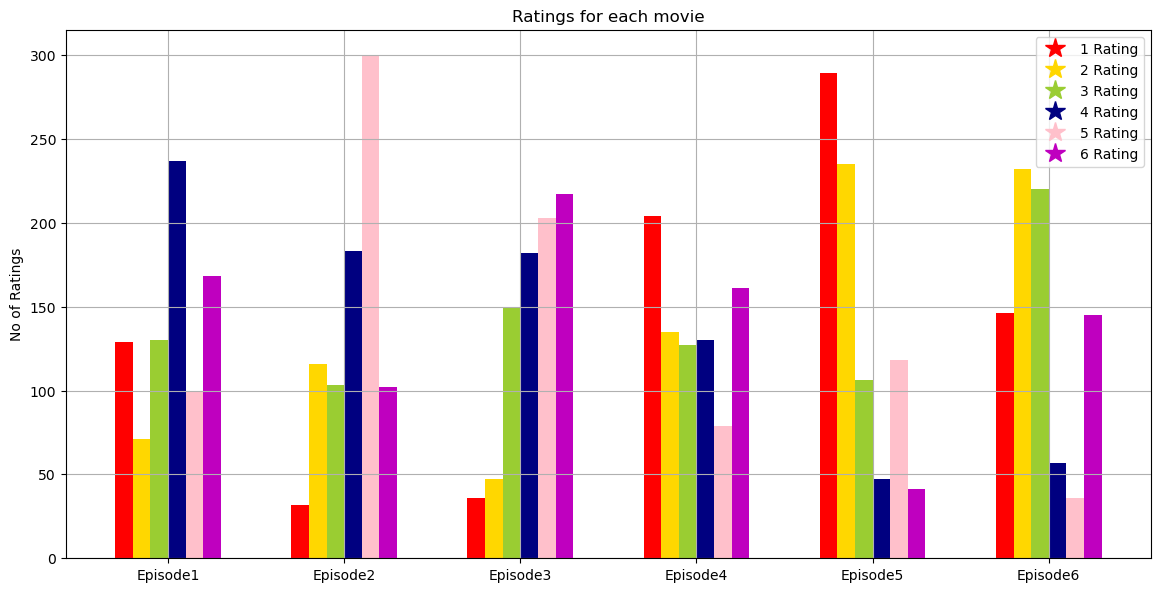

In [3]:
# ////// Task 2

# //////2.1

movie_rating_df = pd.DataFrame()
for single_movie in rank_cols:
    movie_rating_df[single_movie] = watched_movie_df.sort_values(single_movie)[single_movie].value_counts(sort=False)

fig, axes = plt.subplots(1, 1, figsize=(14, 7), dpi=100)

colors = ['red', 'gold', 'yellowgreen', 'navy', 'pink', 'm']
x_labels = ['Episode1', 'Episode2', 'Episode3', 'Episode4', 'Episode5', 'Episode6']
legend_labels = ['1 Rating', '2 Rating', '3 Rating', '4 Rating', '5 Rating', '6 Rating']
bar_width = 0.1
bar_idx = list(range(len(movie)))

# Grouped bar chart
axes.bar(
    bar_idx,
    movie_rating_df.iloc[0] ,
    bar_width, color=colors[0], label='1 Rating')

axes.bar(
    [idx + (bar_width) for idx in bar_idx],
    movie_rating_df.iloc[1] ,
    bar_width, color=colors[1], label='2 Rating')

axes.bar(
    [idx + (2*bar_width) for idx in bar_idx],
    movie_rating_df.iloc[2] ,
    bar_width, color=colors[2], label='3 Rating')

axes.bar(
    [idx + (3*bar_width) for idx in bar_idx],
    movie_rating_df.iloc[3] ,
    bar_width, color=colors[3], label='4 Rating')

axes.bar(
    [idx + (4*bar_width) for idx in bar_idx],
    movie_rating_df.iloc[4] ,
    bar_width, color=colors[4], label='5 Rating')

axes.bar(
    [idx + (5*bar_width) for idx in bar_idx],
    movie_rating_df.iloc[5] ,
    bar_width, color=colors[5], label='6 Rating')

# Making X axis ticks modifications
axes.set_xticks([idx + (2.5*bar_width) for idx in bar_idx])
axes.set_xticklabels(x_labels)
# Setting Y axis label
axes.set_ylabel('No of Ratings')
# Setting title
axes.set_title('Ratings for each movie')

legend_marker = [Line2D([],[],marker='*', color=colors[i], linestyle = 'None', markersize=15, label= legend_labels[i]) for i in range(len(colors))]

plt.legend(handles = legend_marker, loc= 'upper right')
plt.grid()


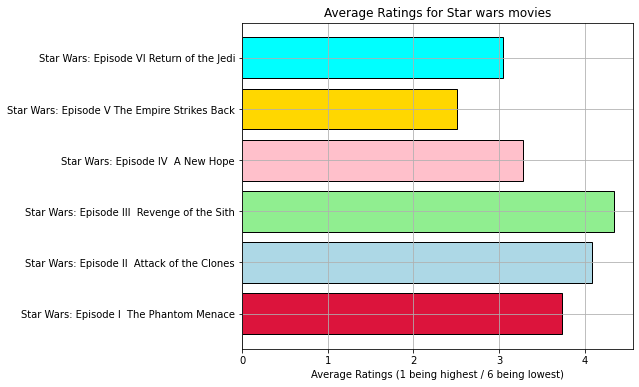

In [4]:
average_rating_array = np.array([])
for single_movie in rank_cols:
    average_rating_array = np.append(average_rating_array,watched_movie_df[single_movie].mean())

colors = ['crimson','lightblue','lightgreen','pink', 'gold', 'cyan']

fig, axes = plt.subplots(1, 1, figsize=(7, 6))
axes.barh(movie, pd.Series(average_rating_array),label= [movie[i] for i in range(len(movie))], color=colors, edgecolor='black')

# setting X and Y axis label and title
axes.set_xlabel('Average Ratings (1 being highest / 6 being lowest)')
axes.set_xticklabels(range(6))
axes.set_title('Average Ratings for Star wars movies')
plt.grid()

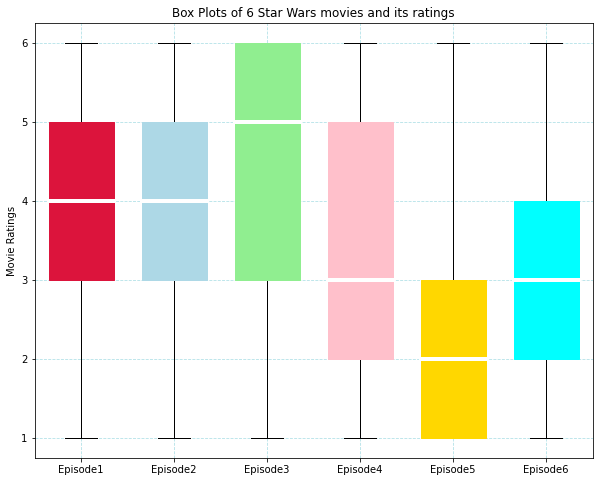

In [5]:
colors = ['crimson','lightblue','lightgreen','pink', 'gold', 'cyan']
fig,ax = plt.subplots(1,1,figsize=(10,8))

boxplt = ax.boxplot([watched_movie_df[rank_cols[i]] for i in range(len(rank_cols))], patch_artist=True, widths=0.7)
ax.set_xticklabels(x_labels)
ax.set_ylabel('Movie Ratings')
ax.set_title('Box Plots of 6 Star Wars movies and its ratings')

for whisker, median, color in zip(boxplt['boxes'], boxplt['medians'], colors):
    whisker.set(color=color)
    median.set(color='white', linewidth=4)
    
plt.grid(linestyle='--', color='powderblue')
plt.show()

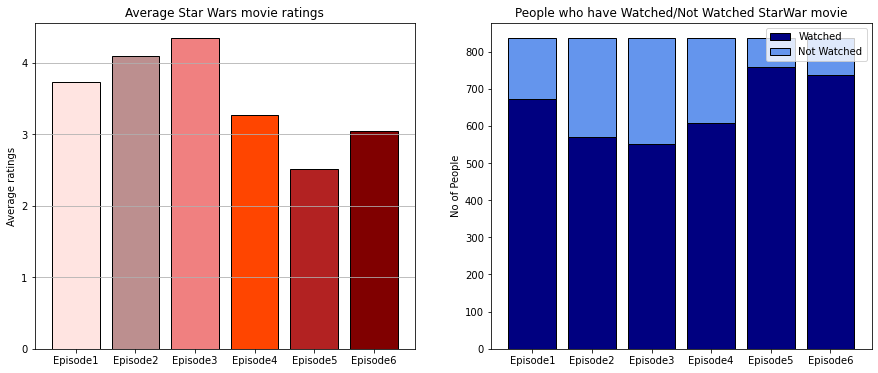

In [6]:
# Task 2.2: Relationships between columns

# Relationship between 'Rank the movies' column and 'Select the movies that you have seen'

average_rating_array = np.array([])
watched_movie_count_arr = np.array([])
notwatched_movie_count_arr = np.array([])

for movie_rank_col, single_movie in zip(rank_cols, movie):
    average_rating_array = np.append(average_rating_array,watched_movie_df[movie_rank_col].mean())
    watch_count = max(watched_movie_df[single_movie].value_counts())
    watched_movie_count_arr = np.append(watched_movie_count_arr, watch_count)
    notwatched_movie_count_arr = np.append(notwatched_movie_count_arr, len(watched_movie_df) - watch_count)

colors = ['mistyrose', 'rosybrown','lightcoral','orangered','firebrick', 'maroon']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].bar(x_labels, pd.Series(average_rating_array),label= [movie[i] for i in range(len(movie))], color=colors, edgecolor='black')
axes[0].set_title("Average Star Wars movie ratings")
axes[0].set_ylabel("Average ratings")
axes[0].grid(axis='y')

axes[1].bar(x_labels, pd.Series(watched_movie_count_arr),label= 'Watched', color='navy', edgecolor='black')
axes[1].bar(x_labels, pd.Series(notwatched_movie_count_arr),label= 'Not Watched', bottom=watched_movie_count_arr,color='cornflowerblue', edgecolor='black')
axes[1].set_title("People who have Watched/Not Watched StarWar movie")
axes[1].set_ylabel("No of People")
plt.legend()
plt.show()


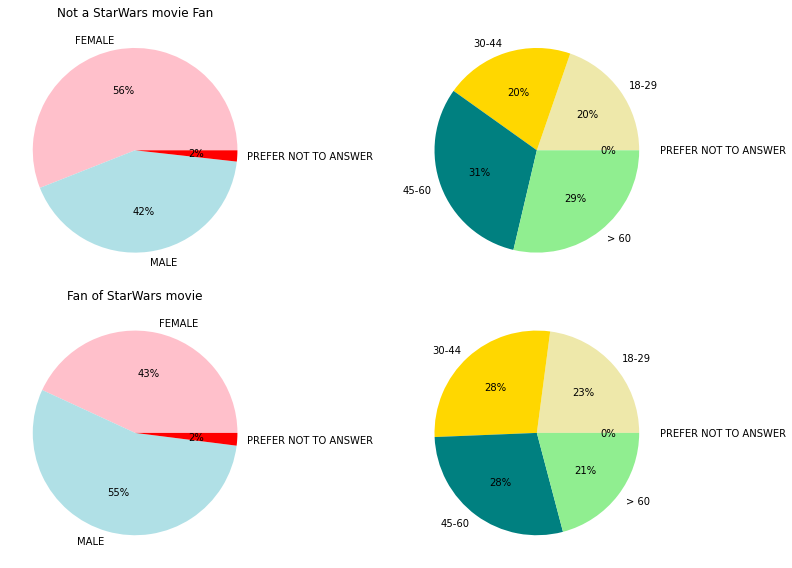

In [7]:
# Relation between 'Are you a fan of starwars movie' and 'Gender' & 'Age' column

age_colors = ['palegoldenrod','gold','teal','lightgreen','red']
gender_colors = ['pink', 'powderblue', 'red']

not_fan_age_perc = watched_movie_df[watched_movie_df['starwars_fan_col'] == 'NO']['Age'].value_counts(sort=False,normalize=True)
not_fan_gender_perc = watched_movie_df[watched_movie_df['starwars_fan_col'] == 'NO']['Gender'].value_counts(sort=False,normalize=True)

fan_age_perc = watched_movie_df[watched_movie_df['starwars_fan_col'] == 'YES']['Age'].value_counts(sort=False,normalize=True)
fan_gender_perc = watched_movie_df[watched_movie_df['starwars_fan_col'] == 'YES']['Gender'].value_counts(sort=False,normalize=True)

fig,axes = plt.subplots(2,2, figsize=(12,8))
axes[0][0].pie(not_fan_gender_perc, labels = gender_category,colors = gender_colors, autopct='%1.0f%%')
axes[0][0].set_title('Not a StarWars movie Fan')
axes[0][1].pie(not_fan_age_perc,labels = age_category,colors=age_colors, explode=(0,0,0,0,0.1), autopct='%1.0f%%')
axes[1][0].pie(fan_gender_perc, labels = gender_category ,colors = gender_colors, autopct='%1.0f%%')
axes[1][0].set_title('Fan of StarWars movie')
axes[1][1].pie(fan_age_perc,labels = age_category,colors=age_colors, explode=(0,0,0,0,0.1), autopct='%1.0f%%')

plt.tight_layout()

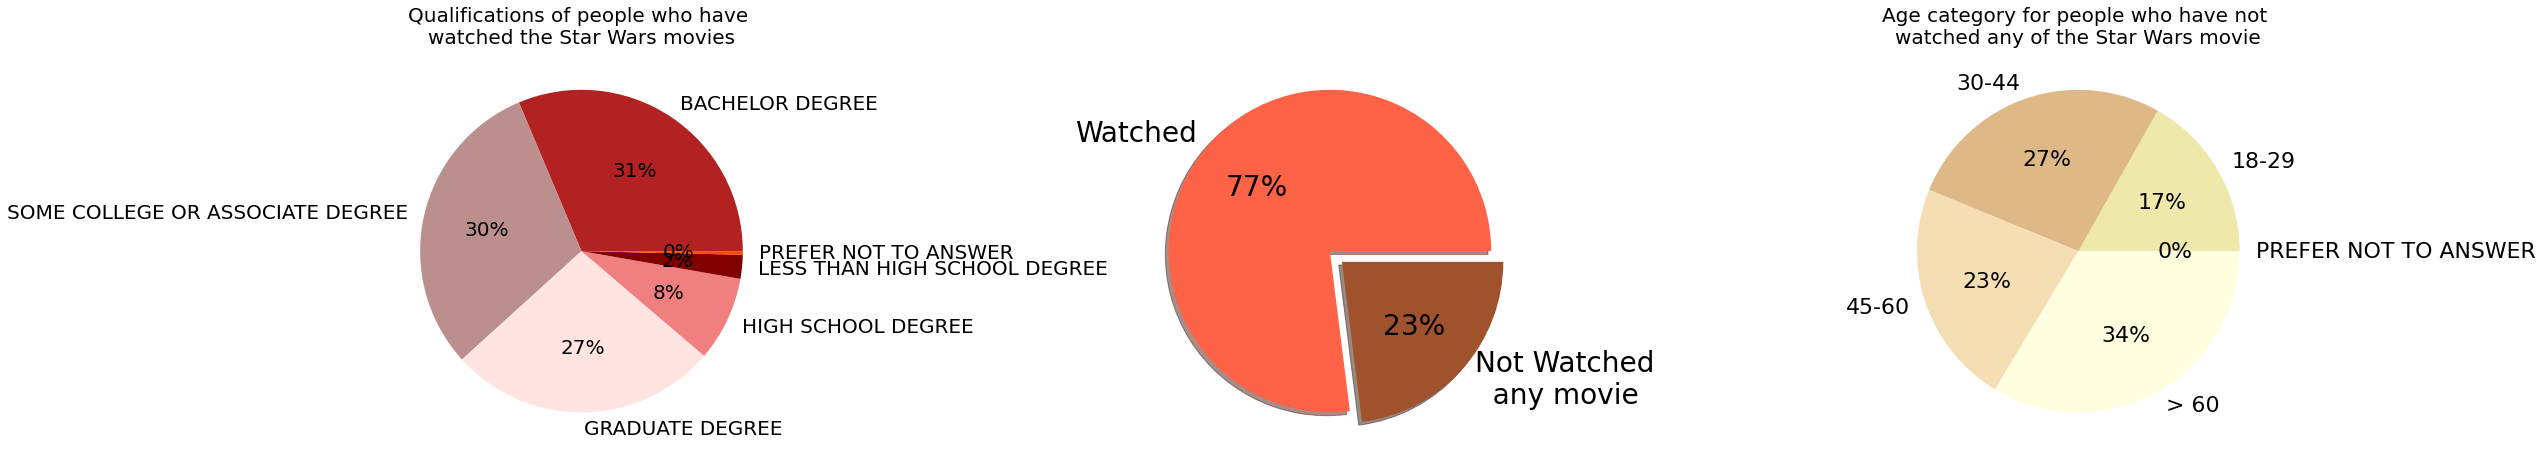

In [22]:
# Relation between People who have not watched any of the Star Wars movies and Age

watched_education_colors = ['firebrick','rosybrown', 'mistyrose','lightcoral','maroon','orangered']
not_watched_age_colors = ['palegoldenrod','burlywood','wheat','lightyellow','yellow']

fig,axes = plt.subplots(1,3, figsize=(35,35))
axes[0].pie(watched_movie_df['Education'].value_counts(), labels = education_category, colors = watched_education_colors, autopct='%1.0f%%', textprops={'fontsize': 20} )
axes[0].set_title('Qualifications of people who have \nwatched the Star Wars movies', fontsize=20)

axes[1].pie([len(watched_movie_df), len(not_watched_movie_df)], labels=['Watched', 'Not Watched\n  any movie'],colors = ['tomato','sienna'], autopct='%1.0f%%',textprops={'fontsize': 28}, explode=(0,0.10), shadow = True)

axes[2].pie(not_watched_movie_df['Age'].value_counts(sort=False), labels = age_category, colors=not_watched_age_colors, autopct='%1.0f%%', textprops={'fontsize': 22})
axes[2].set_title('Age category for people who have not \nwatched any of the Star Wars movie', fontsize=20)
fig.tight_layout(pad=0.7)
plt.show()


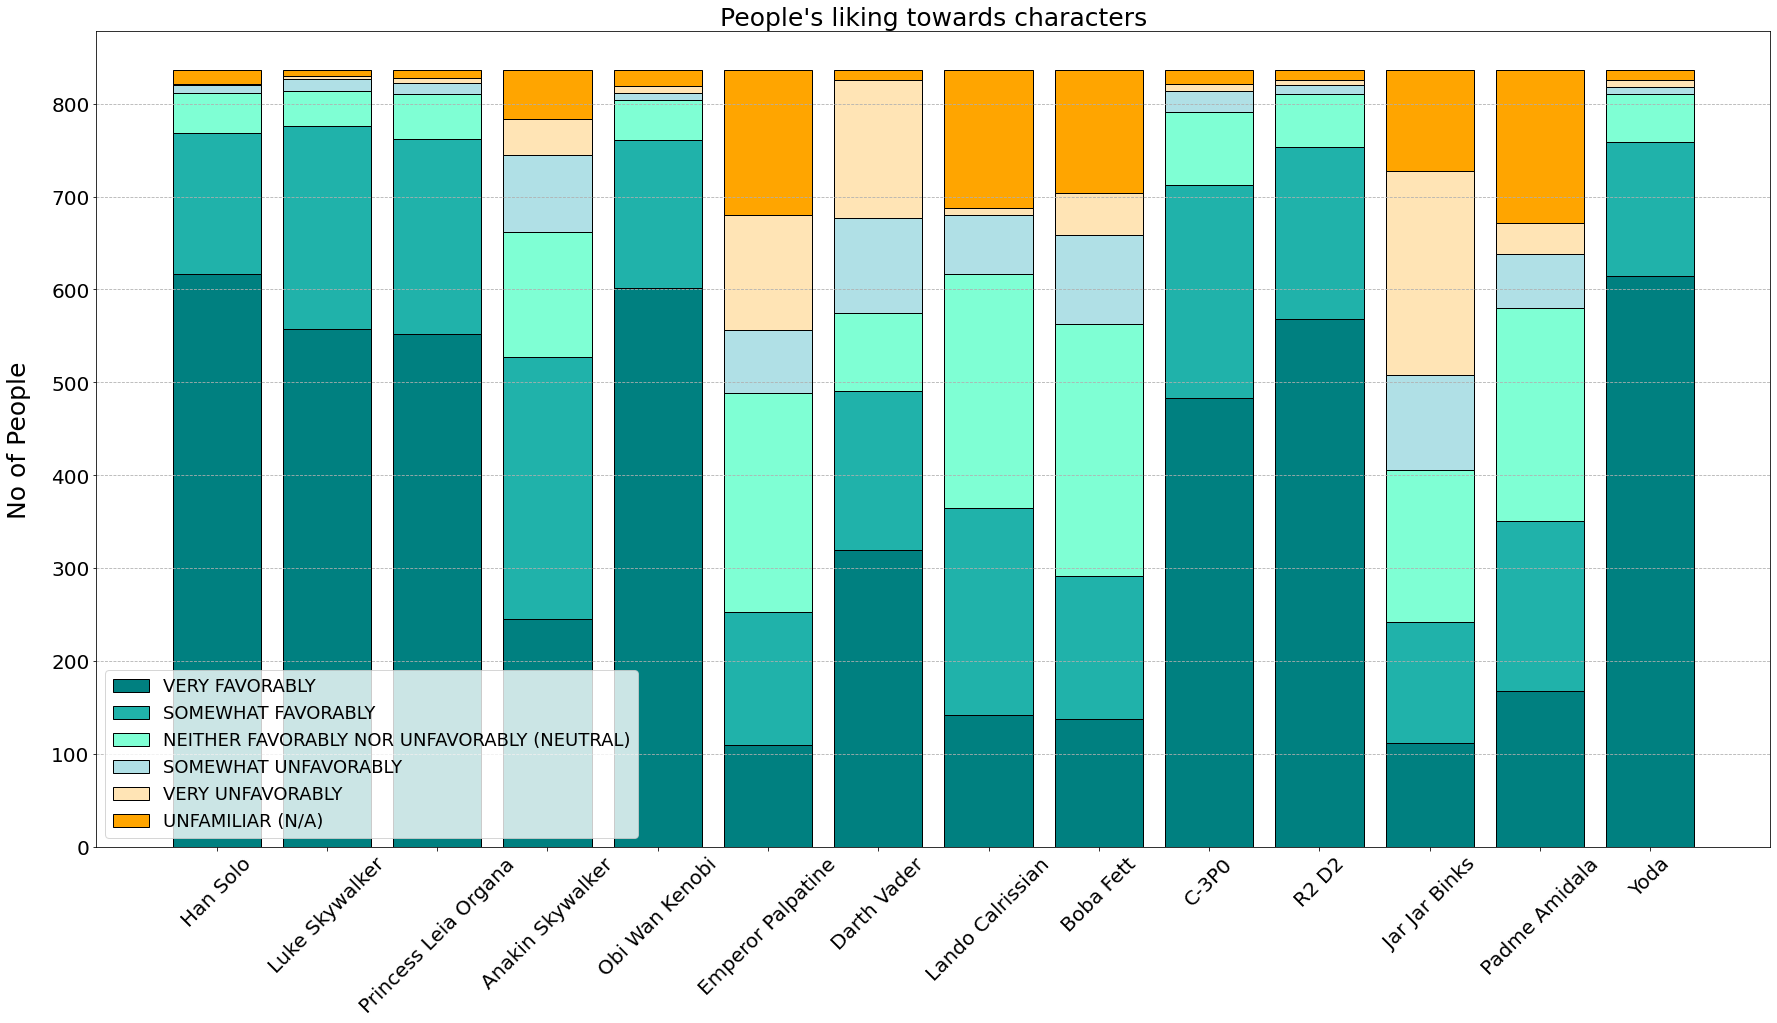

In [9]:
character_rating_count_df = pd.DataFrame()

for character in characters:
    character_rating_count_df[character] = watched_movie_df[character].value_counts(sort=False)

colors = ['teal', 'lightseagreen', 'aquamarine', 'powderblue', 'moccasin','orange']
#colors = ['maroon', 'lightcoral', 'rosybrown', 'mistyrose','bisque', 'red']

fig,ax = plt.subplots(1,1, figsize=(30,15))

bottom0 = character_rating_count_df.iloc[0]
ax.bar(characters, bottom0, label= characters_category[0], color= colors[0], edgecolor='black')
bottom1 = character_rating_count_df.iloc[1]
ax.bar(characters, bottom1, label= characters_category[1], bottom = bottom0, color=colors[1], edgecolor='black')
bottom2 = character_rating_count_df.iloc[2]
ax.bar(characters, bottom2, label= characters_category[2], bottom = [i+j for i,j in zip(bottom0, bottom1)], color=colors[2], edgecolor='black')
bottom3 = character_rating_count_df.iloc[3]
ax.bar(characters, bottom3, label= characters_category[3], bottom = [i+j+k for i,j,k in zip(bottom0, bottom1, bottom2)], color=colors[3], edgecolor='black')
bottom4 = character_rating_count_df.iloc[4]
ax.bar(characters, bottom4, label= characters_category[4], bottom = [i+j+k+l for i,j,k,l in zip(bottom0, bottom1, bottom2, bottom3)], color=colors[4], edgecolor='black')
bottom5 = character_rating_count_df.iloc[5]
ax.bar(characters, bottom5, label= characters_category[5], bottom = [i+j+k+l+m for i,j,k,l,m in zip(bottom0, bottom1, bottom2, bottom3, bottom4)], color=colors[5], edgecolor='black')

ax.set_title("People's liking towards characters", fontsize=25)
ax.set_ylabel("No of People", fontsize=25, labelpad=20)
ax.tick_params(axis='x', labelsize=20, rotation=45)
ax.tick_params(axis='y', labelsize=20)
plt.legend(loc='lower left', prop= {'size':18})
plt.grid(axis='y', linestyle = '--')

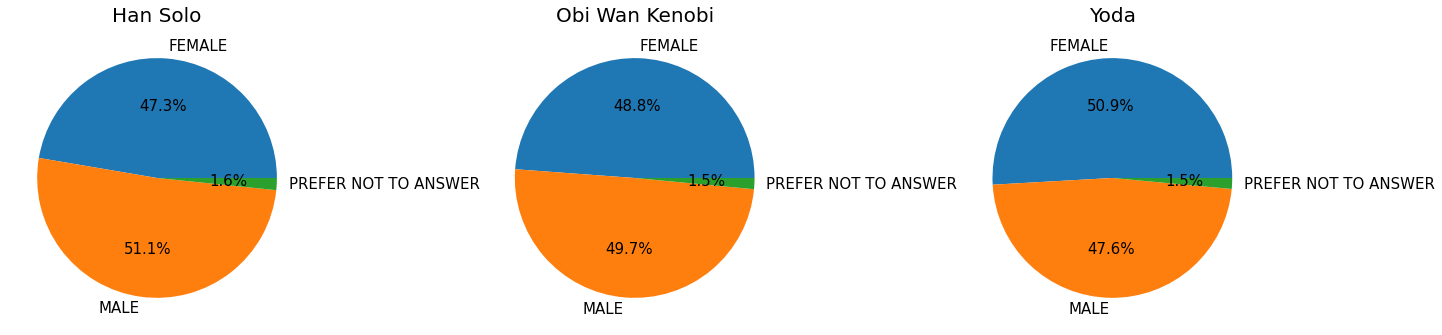

In [10]:
columns = ['Gender', 'Location', 'Education']
fav_characters = [characters[0], characters[4], characters[13]]

fig, axes = plt.subplots(1,3,figsize=(20,10))

axes[0].pie(watched_movie_df[watched_movie_df[(characters[0])] == characters_category[0]]['Gender'].value_counts(sort=False), labels=gender_category, autopct='%1.1f%%', textprops={'fontsize': 15})
axes[0].set_title(characters[0], fontsize=20)
axes[1].pie(watched_movie_df[watched_movie_df[(characters[4])] == characters_category[0]]['Gender'].value_counts(sort=False), labels=gender_category, autopct='%1.1f%%', textprops={'fontsize': 15})
axes[1].set_title(characters[4], fontsize=20)
axes[2].pie(watched_movie_df[watched_movie_df[(characters[13])] == characters_category[0]]['Gender'].value_counts(sort=False), labels=gender_category, autopct='%1.1f%%', textprops={'fontsize': 15})
axes[2].set_title(characters[13], fontsize=20)

fig.tight_layout(pad=0.7)
plt.show()

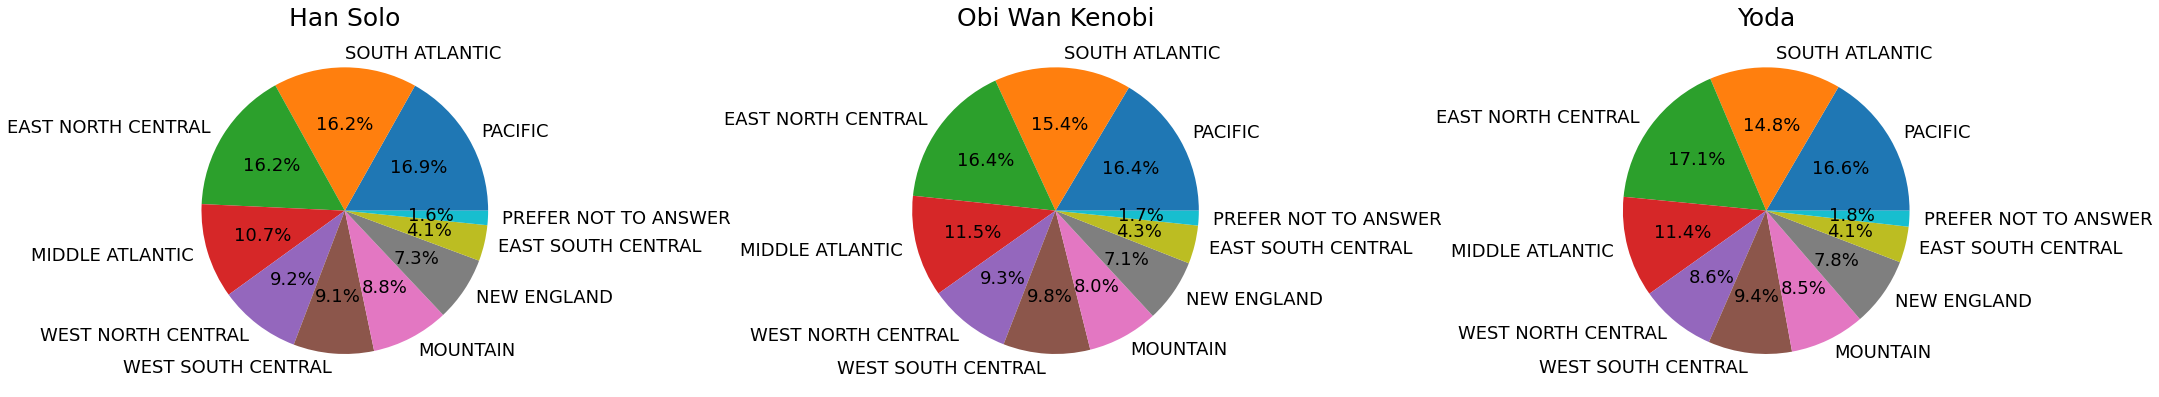

In [11]:
fig, axes = plt.subplots(1,3,figsize=(30,25))

axes[0].pie(watched_movie_df[watched_movie_df[(characters[0])] == characters_category[0]]['Location'].value_counts(sort=False), labels=location_category, autopct='%1.1f%%', textprops={'fontsize': 18})
axes[0].set_title(characters[0], fontsize=25)
axes[1].pie(watched_movie_df[watched_movie_df[(characters[4])] == characters_category[0]]['Location'].value_counts(sort=False), labels=location_category, autopct='%1.1f%%', textprops={'fontsize': 18})
axes[1].set_title(characters[4], fontsize=25)
axes[2].pie(watched_movie_df[watched_movie_df[(characters[13])] == characters_category[0]]['Location'].value_counts(sort=False), labels=location_category, autopct='%1.1f%%', textprops={'fontsize': 18})
axes[2].set_title(characters[13], fontsize=25)

fig.tight_layout(pad=2)
plt.show()

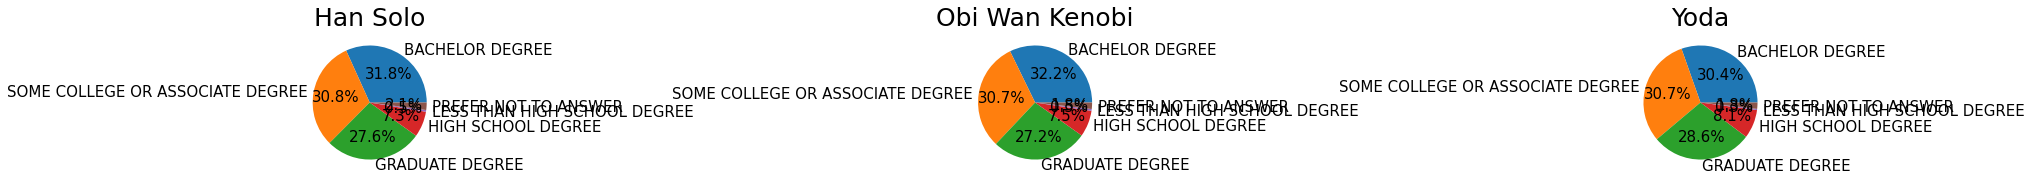

In [12]:
fig, axes = plt.subplots(1,3,figsize=(28,25))

axes[0].pie(watched_movie_df[watched_movie_df[(characters[0])] == characters_category[0]]['Education'].value_counts(sort=False), labels=education_category,autopct='%1.1f%%', textprops={'fontsize': 15})
axes[0].set_title(characters[0], fontsize=25)
axes[1].pie(watched_movie_df[watched_movie_df[(characters[4])] == characters_category[0]]['Education'].value_counts(sort=False), labels=education_category, autopct='%1.1f%%', textprops={'fontsize': 15})
axes[1].set_title(characters[4], fontsize=25)
axes[2].pie(watched_movie_df[watched_movie_df[(characters[13])] == characters_category[0]]['Education'].value_counts(sort=False), labels=education_category, autopct='%1.1f%%', textprops={'fontsize': 15})
axes[2].set_title(characters[13], fontsize=25)

fig.tight_layout(pad=2)
plt.show()

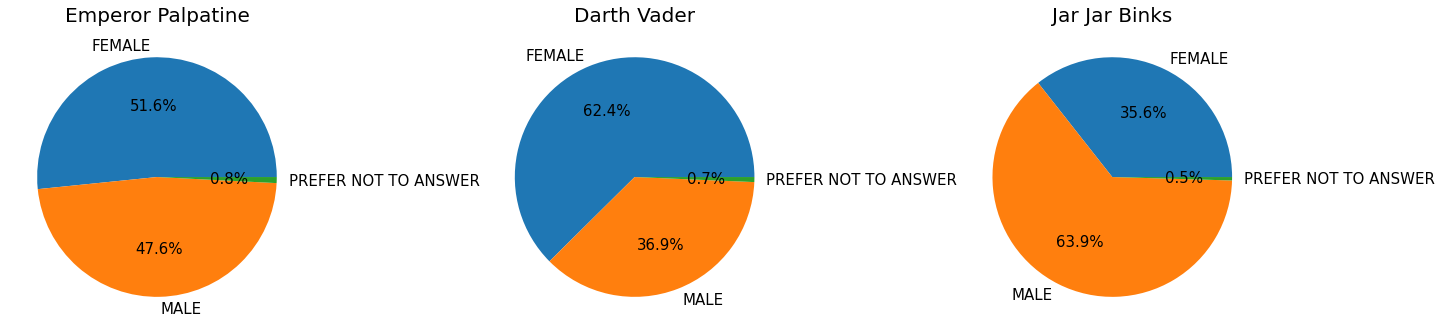

In [13]:
fig, axes = plt.subplots(1,3,figsize=(20,10))

axes[0].pie(watched_movie_df[watched_movie_df[(characters[5])] == characters_category[4]]['Gender'].value_counts(sort=False), labels=gender_category, autopct='%1.1f%%', textprops={'fontsize': 15})
axes[0].set_title(characters[5], fontsize=20)
axes[1].pie(watched_movie_df[watched_movie_df[(characters[6])] == characters_category[4]]['Gender'].value_counts(sort=False), labels=gender_category, autopct='%1.1f%%', textprops={'fontsize': 15})
axes[1].set_title(characters[6], fontsize=20)
axes[2].pie(watched_movie_df[watched_movie_df[(characters[11])] == characters_category[4]]['Gender'].value_counts(sort=False), labels=gender_category, autopct='%1.1f%%', textprops={'fontsize': 15})
axes[2].set_title(characters[11], fontsize=20)

fig.tight_layout(pad=0.7)
plt.show()

In [14]:
print(characters[5],characters[7],characters[12], characters_category[5])
print(watched_movie_df[watched_movie_df[(characters[5])] == characters_category[5]]['Gender'].value_counts())
print(watched_movie_df[watched_movie_df[(characters[5])] == characters_category[5]]['Location'].value_counts())
print(watched_movie_df[watched_movie_df[(characters[5])] == characters_category[5]]['Education'].value_counts())
print(watched_movie_df[watched_movie_df[(characters[5])] == characters_category[5]]['Age'].value_counts())

print(watched_movie_df[watched_movie_df[(characters[7])] == characters_category[5]]['Gender'].value_counts())
print(watched_movie_df[watched_movie_df[(characters[7])] == characters_category[5]]['Location'].value_counts())
print(watched_movie_df[watched_movie_df[(characters[7])] == characters_category[5]]['Education'].value_counts())
print(watched_movie_df[watched_movie_df[(characters[7])] == characters_category[5]]['Age'].value_counts())

print(watched_movie_df[watched_movie_df[(characters[12])] == characters_category[5]]['Gender'].value_counts())
print(watched_movie_df[watched_movie_df[(characters[12])] == characters_category[5]]['Location'].value_counts())
print(watched_movie_df[watched_movie_df[(characters[12])] == characters_category[5]]['Education'].value_counts())
print(watched_movie_df[watched_movie_df[(characters[12])] == characters_category[5]]['Age'].value_counts())

Emperor Palpatine Lando Calrissian Padme Amidala UNFAMILIAR (N/A)
FEMALE                  98
MALE                    56
PREFER NOT TO ANSWER     2
Name: Gender, dtype: int64
PACIFIC                 31
EAST NORTH CENTRAL      30
SOUTH ATLANTIC          23
WEST NORTH CENTRAL      15
MOUNTAIN                13
WEST SOUTH CENTRAL      13
MIDDLE ATLANTIC         13
NEW ENGLAND              8
EAST SOUTH CENTRAL       7
PREFER NOT TO ANSWER     3
Name: Location, dtype: int64
BACHELOR DEGREE                     60
GRADUATE DEGREE                     50
SOME COLLEGE OR ASSOCIATE DEGREE    36
HIGH SCHOOL DEGREE                   8
PREFER NOT TO ANSWER                 2
LESS THAN HIGH SCHOOL DEGREE         0
Name: Education, dtype: int64
45-60                   50
> 60                    40
30-44                   34
18-29                   30
PREFER NOT TO ANSWER     0
Name: Age, dtype: int64
FEMALE                  93
MALE                    54
PREFER NOT TO ANSWER     1
Name: Gender, dtype: in